In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve


train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')


print(train_data.describe())


print(train_data.isnull().sum())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

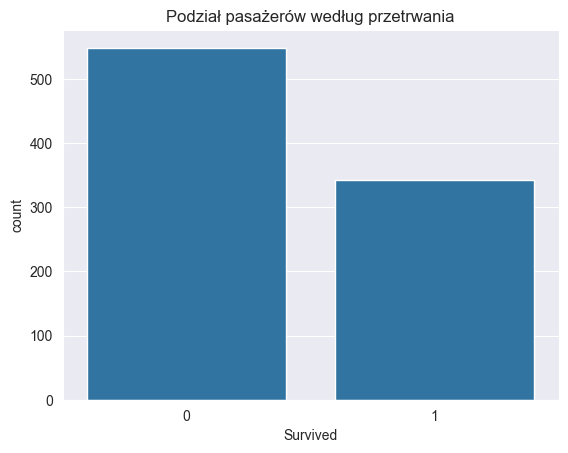

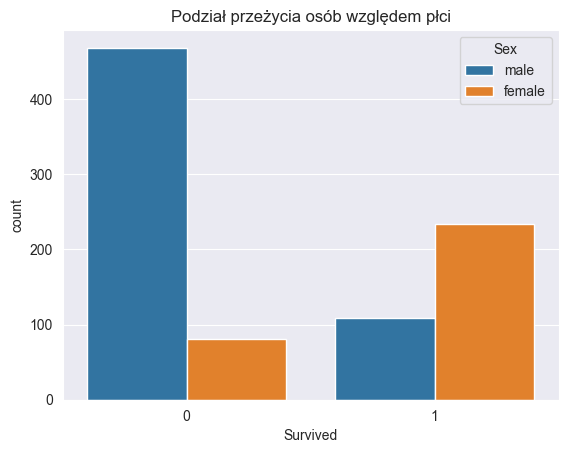

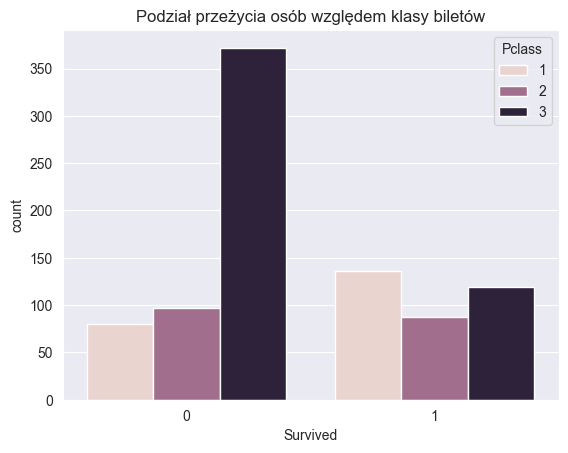

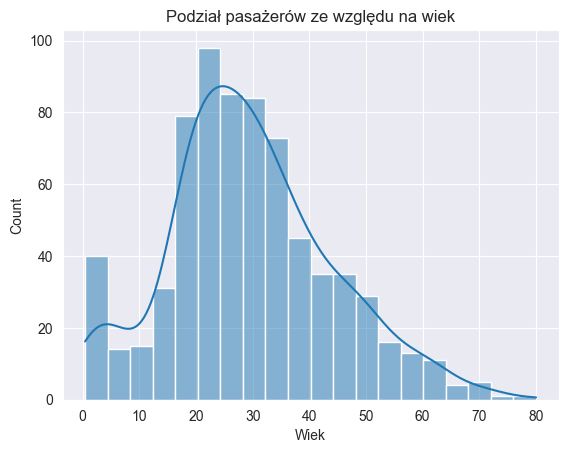

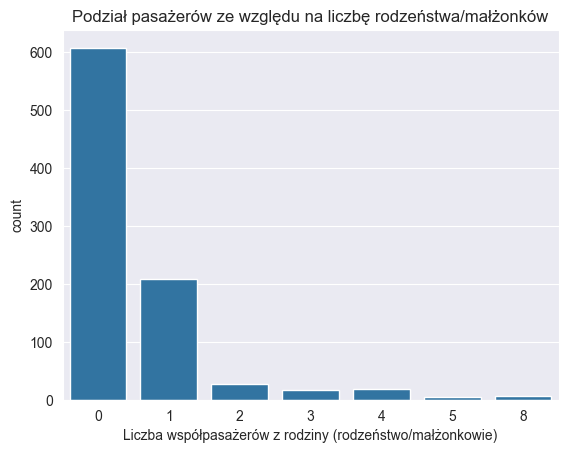

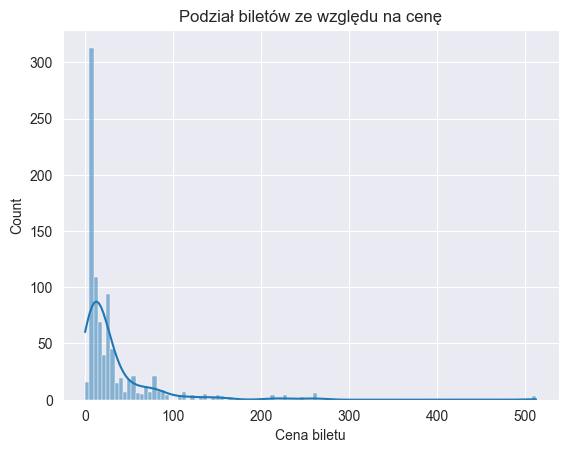

In [2]:


sns.countplot(x='Survived', data=train_data)
plt.title('Podział pasażerów według przetrwania')
plt.show()

sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Podział przeżycia osób względem płci')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Podział przeżycia osób względem klasy biletów')
plt.show()

sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Podział pasażerów ze względu na wiek')
plt.xlabel('Wiek')
plt.show()

sns.countplot(x='SibSp', data=train_data)
plt.title('Podział pasażerów ze względu na liczbę rodzeństwa/małżonków')
plt.xlabel('Liczba współpasażerów z rodziny (rodzeństwo/małżonkowie)')
plt.show()

sns.histplot(train_data['Fare'], kde=True)
plt.title('Podział biletów ze względu na cenę')
plt.xlabel('Cena biletu')
plt.show()




In [3]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


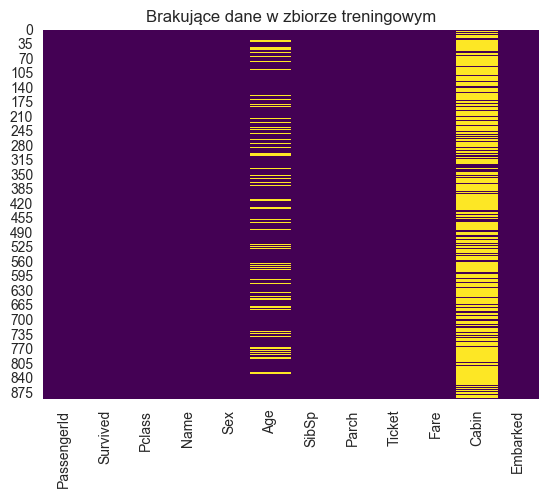

In [4]:
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Brakujące dane w zbiorze treningowym')
plt.show()

In [5]:

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

train_data.drop('Cabin', axis=1, inplace=True)

train_data.dropna(subset=['Embarked'], inplace=True)

C:\Users\tomek\AppData\Local\Temp\ipykernel_23100\2787030375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [6]:

train_data = train_data.dropna(subset=['Embarked'])


KeyError: "['Cabin'] not found in axis"

In [7]:

sex = pd.get_dummies(train_data['Sex'], drop_first=True)
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)

train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

df_titanic = pd.concat([train_data, sex, embark], axis=1)

df_titanic.drop('PassengerId', axis=1, inplace=True)


In [8]:

X = df_titanic.drop('Survived', axis=1)

y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [9]:
lr_model = LogisticRegression(max_iter=500)  

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
print("Raport z klasyfikacji:")
print(classification_report(y_test, y_pred))

print("Macierz błędów:")
print(confusion_matrix(y_test, y_pred))

Raport z klasyfikacji:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

Macierz błędów:
[[98  9]
 [24 47]]


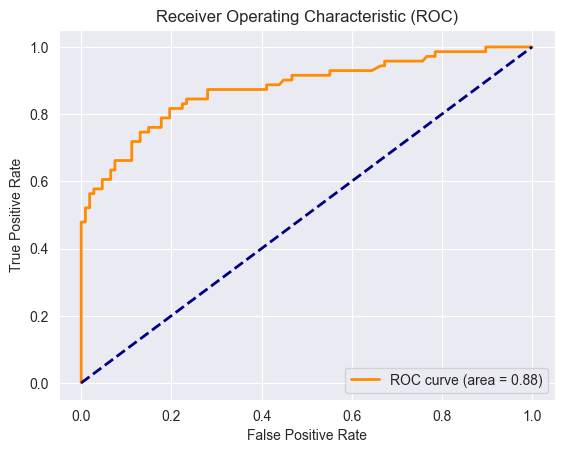

In [12]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

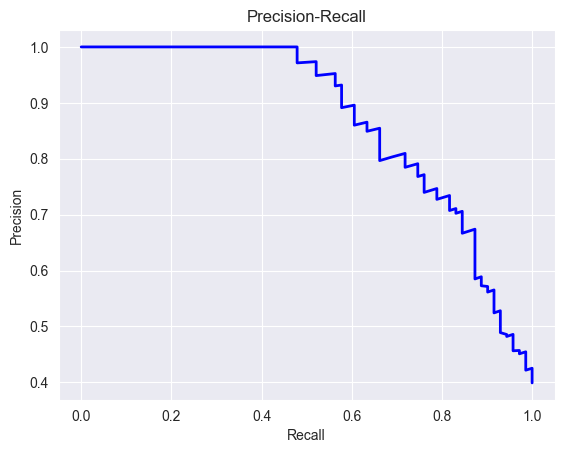

In [13]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.show()